In [1]:
#pip install h3

In [2]:
#pip install astropy-healpix


In [9]:
#To look for most credible region look here: https://emfollow.docs.ligo.org/userguide/tutorial/multiorder_skymaps.html#healpixprimer
from astropy.table import QTable
from astropy import units as u
import astropy_healpix as ah
import numpy as np
import matplotlib.pyplot as plt

import astropy
import numpy 
import healpy
import matplotlib
import numpy as np
import healpy as hp
from pylab import rcParams
#from astropy.stats import bayesian_blocks
import random
import matplotlib as pl
import matplotlib.pyplot as colors
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D
from matplotlib import gridspec
from pylab import rcParams
import matplotlib as pl
rcParams['figure.figsize']=15,8
pl.rcParams['ytick.minor.visible'] =True
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['font.size'] = '15'
pl.rcParams['legend.fontsize'] = '10'
pl.rcParams['legend.borderaxespad'] = '1.9'
pl.rcParams['figure.titlesize'] = 'small'
pl.rcParams['figure.titlesize'] = 'small'
pl.rcParams['xtick.major.size'] = '8'
pl.rcParams['xtick.minor.size'] = '5'
pl.rcParams['xtick.major.width'] = '2'
pl.rcParams['xtick.minor.width'] = '1'
pl.rcParams['ytick.major.size'] = '10'
pl.rcParams['ytick.minor.size'] = '6'
pl.rcParams['ytick.major.width'] = '2'
pl.rcParams['ytick.minor.width'] = '1'
pl.rcParams['xtick.direction'] = 'in'
pl.rcParams['ytick.direction'] = 'in'
pl.rcParams['axes.labelpad'] = '10.0'
pl.rcParams['lines.dashed_pattern']=3.0, 1.4
pl.rcParams['lines.dotted_pattern']= 1.0, 0.7
pl.rcParams['xtick.labelsize'] = '15'
pl.rcParams['ytick.labelsize'] = '15'
pl.rcParams['axes.labelsize'] = '19'
pl.rcParams['axes.labelsize'] = '19'
pl.rcParams['xtick.major.pad']='10'
pl.rcParams['xtick.minor.pad']='10'
from  astropy.utils.data import download_file
# #pl.rcParams['hatch.color'] = 'black'
# pl.rc('axes', linewidth=2)
# from matplotlib import gridspec
# from matplotlib import rc
# gs = gridspec.GridSpec(1, 1)
# rc('axes', linewidth=1.0)

#pl.rcParams['text.usetex'] = True
#pl.rcParams['text.latex.unicode'] = True
#pl.rcParams['font.family'] = 'serif'
#pl.rcParams['font.serif']='Times New Roman'

#plt.subplots(nrows=2, ncols=1, figsize=(6,6))
import pylab
from matplotlib import rc
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 1)
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('axes', linewidth=2.5)
import re, os
current_directory = os.getcwd()
print (current_directory)


/home/hulk/Documents/new_pipeline_systematic/0_20ks


In [10]:
import yaml

def read_one_block_of_yaml_data(filename):
    with open(f'{filename}.yaml','r') as f:
        output = yaml.safe_load(f)
    #print(output) 
    return (output)


In [26]:
file_contents_main=read_one_block_of_yaml_data('configuration')
print ('lalmap', str(file_contents_main['GWevent']['lalmap']))
print ('multiordermap',str(file_contents_main['GWevent']['multiorder']) )

lalmap=str(file_contents_main['GWevent']['lalmap'])
multiorder=str(file_contents_main['GWevent']['multiorder'])

final_lalskymap = download_file(remote_url= lalmap,cache = True)

prob, header = hp.read_map(filename=final_lalskymap, h=True, verbose=False)

header = dict(header)
trigger_time_mjd=header['MJD-OBS']
print ('Trigger time [MJD]', trigger_time_mjd)

data_obs=header['DATE-OBS']
x=str(data_obs.split('T')[0])
time=str(data_obs.split('T')[1])
date_obs=x+' '+time
print ('Trigger time [date]', date_obs)


lalmap https://gracedb.ligo.org/api/superevents/S190814bv/files/LALInference.v1.fits.gz
multiordermap https://gracedb.ligo.org/apiweb/superevents/S190814bv/files/GW190814_PublicationSamples.multiorder.fits,0


/tmp/ipykernel_12431/3303613260.py:10: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  prob, header = hp.read_map(filename=final_lalskymap, h=True, verbose=False)


Trigger time [MJD] 58709.88239578551
Trigger time [date] 2019-08-14 21:10:38.995869


## 90% credible area
#### https://emfollow.docs.ligo.org/userguide/tutorial/multiorder_skymaps.html#healpixprimer

In [12]:
skymap = QTable.read(multiorder)
skymap.sort('PROBDENSITY', reverse=True)
level, ipix = ah.uniq_to_level_ipix(skymap['UNIQ'])
pixel_area = ah.nside_to_pixel_area(ah.level_to_nside(level))
prob = pixel_area * skymap['PROBDENSITY']
cumprob = np.cumsum(prob)
i = cumprob.searchsorted(0.9)

area_90 = pixel_area[:i].sum()
area_90.to_value(u.deg**2)

18.831651164425562

## Save 90% credible area in a file

In [13]:
skymap = skymap[:i]
skymap.sort('UNIQ')
skymap = skymap['UNIQ',]
skymap.write(current_directory+'/90percent.moc.fits',overwrite='True')


## Get RA dec for the credible region

In [14]:
credible_multiorder=current_directory+'/90percent.moc.fits'
skymap = QTable.read(credible_multiorder)
uniq = skymap['UNIQ']
level, ipix = ah.uniq_to_level_ipix(uniq)
nside = ah.level_to_nside(level)
ra, dec = ah.healpix_to_lonlat(ipix, nside, order='nested')
ra_credible=ra.deg
dec_credible=dec.deg

## Plot 90% credible region

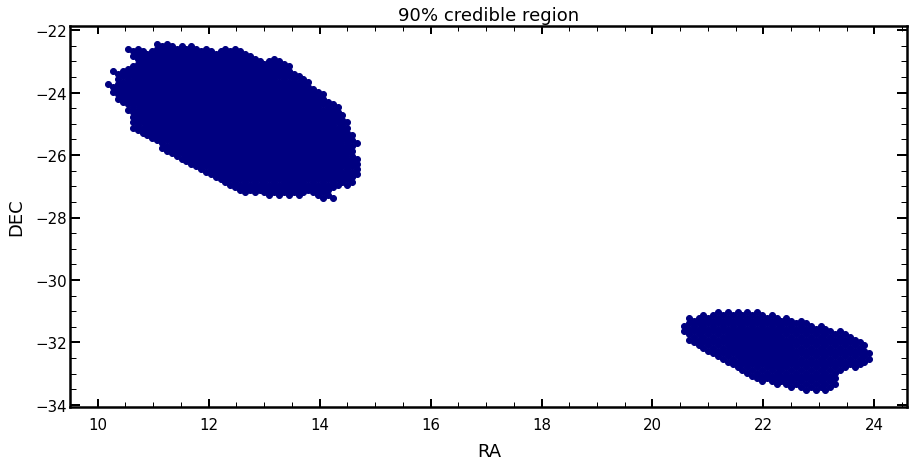

In [23]:
plt.scatter(ra_credible,dec_credible,color='navy')
plt.xlabel('RA',size=18)
plt.ylabel('DEC',size=18)
plt.title('90% credible region')
plt.savefig(current_directory+'/LALskymap_ra_dec_map.pdf')
plt.savefig(current_directory+'/LALskymap_ra_dec_map.png')

## Save credible region's RA, DEC in a file

In [27]:
zipped=np.array([ra_credible,dec_credible]).T
np.savetxt(current_directory+'/final_pixel_credible_region_ra_dec.txt',zipped)

ra_lst=ra_credible
dec_lst=dec_credible

In [17]:
# level, ipix = ah.uniq_to_level_ipix(skymap['UNIQ'])
# pixel_area = ah.nside_to_pixel_area(ah.level_to_nside(level))
# nside = ah.level_to_nside(level)
# ra_comp, dec_comp = ah.healpix_to_lonlat(ipix, nside, order='nested')

# print (ra_comp.deg,dec_comp.deg)

# plt.scatter(ra_comp.deg,dec_comp.deg,color='crimson')

In [18]:
# skymap.sort('PROBDENSITY', reverse=True)


# level, ipix = ah.uniq_to_level_ipix(skymap['UNIQ'])
# pixel_area = ah.nside_to_pixel_area(ah.level_to_nside(level))
# nside = ah.level_to_nside(level)

# prob = pixel_area * skymap['PROBDENSITY']

# cumprob = np.cumsum(prob)

# i = cumprob.searchsorted(0.9)

# area_90 = pixel_area[:i].sum()
# area_90.to_value(u.deg**2)

# skymap = skymap[:i]
# print (skymap)
# skymap.sort('UNIQ')
# level, ipix = ah.uniq_to_level_ipix(skymap['UNIQ'])
# pixel_area = ah.nside_to_pixel_area(ah.level_to_nside(level))
# nside = ah.level_to_nside(level)

# ra_credible, dec_credible = ah.healpix_to_lonlat(ipix, nside, order='nested')

# plt.scatter(ra_credible.deg,dec_credible.deg,color='navy')
# plt.xlabel('RA',size=18)
# plt.ylabel('DEC',size=18)
# plt.title('90% credible region')
# plt.savefig(current_directory+'/LALskymap_ra_dec_map.pdf')
# plt.show()

In [19]:
# zipped=np.array([ra_credible.deg,dec_credible.deg]).T
# np.savetxt(current_directory+'/final_pixel_ra_dec.txt',zipped)

# ra_lst=ra_credible.deg
# dec_lst=dec_credible.deg


# # zipped_credible_ra_dec=np.array([ra_lst,dec_lst]).T
# # np.savetxt(current_directory+'/GW_credible_ra_Dec.txt')

# print (ra_credible.size)

In [20]:
#Specify below the side of grids
grid_size=float(file_contents_main['GWevent']['GWgridsize'])
print (grid_size)

import matplotlib.pyplot as plt
rcParams['figure.figsize']=15,7
#Plot the sky localization [RA , DEC] for GW event within 0.9 probbaility region
total_bright_pixels=ra_lst.size
# plt.scatter(ra_lst,dec_lst,marker='o',color='crimson',alpha=0.5)
# #print (ra_lst)
# plt.xlabel('RA', size=25)
# plt.ylabel('DEC', size=25)

# How large range of RA and dec is covered in the sky
width_ra=np.round(max(ra_lst) - min(ra_lst),2)
width_dec=np.round(max(dec_lst) - min(dec_lst),2)

# Specify number of grids to make in RA and DEC axis for given grid size
num_blocks_ra=int(np.round(width_ra/(grid_size)))
print ('Number of blocks in RA axis: ', num_blocks_ra)
num_blocks_dec=int(np.round(width_dec/(grid_size)))
print ('Number of blocks in DEC axis: ', num_blocks_dec)

#============THIS block gives the start and end value of grid blocks in ra and dec axis========================

grid_values_ra=[]
grid_values_dec=[]

old_ra=min(ra_lst)
grid_values_ra.append(old_ra)
for i in range(num_blocks_ra+1):
    #plt.axvline(x=old_ra+grid_size,linestyle='--',color='black')
    grid_values_ra.append(old_ra+grid_size)
    old_ra=old_ra+grid_size
    
old_dec=min(dec_lst) 
grid_values_dec.append(old_dec)
for j in range(num_blocks_dec+1):
     #plt.axhline(y=old_dec+grid_size,linestyle='--',color='black')
     grid_values_dec.append(old_dec+grid_size)   
     old_dec=old_dec+grid_size
    

grid_values_ra=np.array(grid_values_ra)
# for i in range(grid_values_ra.size):
#     plt.axvline(x=grid_values_ra[i],linestyle='--',color='grey',alpha=0.5)
    
grid_values_dec=np.array(grid_values_dec)
# for i in range(grid_values_dec.size):
#     plt.axhline(y=grid_values_dec[i],linestyle='--',color='grey',alpha=0.5)    
    
#====================================================================    
    

cell_info_ra_grid=[]
cell_info_dec_grid=[]

store_ra_gridra=[]
store_dec_gridra=[]
ra_start_cord_gridra=[]
ra_end_cord_gridra=[]

store_ra_griddec=[]
store_dec_griddec=[]
dec_start_cord_griddec=[]
dec_end_cord_griddec=[]

for i in range (ra_lst.size):
    #print ('RA value', ra_lst[i])
    for j in range (grid_values_ra.size-1):
        #print (grid_values_ra[j])
        #print (grid_values_ra[j+1])
        if ( grid_values_ra[j] <= ra_lst[i] < grid_values_ra[j+1] ):
            #print ('YASSSSSS')
            #plt.scatter(ra_lst[i], dec_lst[i], color='black' )
            #plt.axvspan(grid_values_ra[j],grid_values_ra[j+1],color='crimson',alpha=0.01)
            
            store_ra_gridra.append(ra_lst[i])
            store_dec_gridra.append(dec_lst[i])
            ra_start_cord_gridra.append(grid_values_ra[j])
            ra_end_cord_gridra.append(grid_values_ra[j+1])
            
            #pixel_loc_grid_ra=[ra_lst[i], dec_lst[i], grid_values_ra[j], grid_values_ra[j+1]]
            #print (pixel_loc_grid_ra)
            #cell_info_ra_grid.append(pixel_loc_grid_ra)
            #print ('Cell information', cell_info)
            
        else:
            pass
    pass
            
    for k in range (grid_values_dec.size-1):
        if (grid_values_dec[k] <= dec_lst[i] < grid_values_dec[k+1]):
            #plt.scatter(ra_lst[i], dec_lst[i], color='black' )
            #plt.axhspan(grid_values_dec[k],grid_values_dec[k+1],color='grey',alpha=0.01)
            
            store_ra_griddec.append(ra_lst[i])
            store_dec_griddec.append(dec_lst[i])
            dec_start_cord_griddec.append(grid_values_dec[k])
            dec_end_cord_griddec.append(grid_values_dec[k+1])
            
            #pixel_loc_grid_dec=[ra_lst[i], dec_lst[i], grid_values_dec[k], grid_values_dec[k+1]]
            #cell_info_dec_grid.append(pixel_loc_grid_dec)
            


# print (cell_info_ra_grid)
# print (cell_info_dec_grid)
store_ra_gridra=np.array(store_ra_gridra)
store_dec_gridra=np.array(store_dec_gridra)
ra_start_cord_gridra=np.array(ra_start_cord_gridra)
ra_end_cord_gridra=np.array(ra_end_cord_gridra)

store_ra_griddec=np.array(store_ra_griddec)
store_dec_griddec=np.array(store_dec_griddec)
dec_start_cord_griddec=np.array(dec_start_cord_griddec)
dec_end_cord_griddec=np.array(dec_end_cord_griddec)

zipped=np.array([store_ra_gridra, store_dec_gridra, ra_start_cord_gridra, ra_end_cord_gridra, dec_start_cord_griddec, dec_end_cord_griddec]).T
np.savetxt('./pixel_grid_info_.txt', zipped)


#plt.show()
# plt.plot(store_ra_griddec,color='black',alpha=0.1)
# plt.plot(store_ra_gridra,color='red', alpha=0.4)


array=np.genfromtxt('./pixel_grid_info_.txt')
ra=array[:,0]
dec=array[:,1]

ra_start_grid=array[:,2]
ra_end_grid=array[:,3]
dec_start_grid=array[:,4]
dec_end_grid=array[:,5]

print (ra.size)
seed=random.randint(0,ra.size)  
print (seed)

# for i in range(seed,seed+1):
#     ra_dot=[ra[i]]
#     dec_dot=[dec[i]]
#     plt.scatter(ra_dot,dec_dot,color='black',marker='s')
#     plt.axhline(y=dec_start_grid[i],linestyle='--',color='black',linewidth=3)
#     plt.axhline(y=dec_end_grid[i],linestyle='--',color='black',linewidth=3)
#     plt.axvline(x=ra_start_grid[i],linestyle='--',color='black',linewidth=3)
#     plt.axvline(x=ra_end_grid[i],linestyle='--',color='black',linewidth=3)
#     x_axis=np.linspace(ra_start_grid[i], ra_end_grid[i])
#     y_axis1=dec_start_grid[i]
#     y_axis2=dec_end_grid[i]
    
#     plt.fill_between(x_axis,y_axis1,y_axis2,color='dodgerblue',alpha=0.4)
    
# plt.show()
#HOw to know how many events are taking place in a grid?

print (grid_values_dec)
# print (dec_start_grid)
# print (dec_end_grid)

# for i in range (grid_values_ra.size):
#     for j in range (grid_values_dec.size):

ra_grid_final=[]
dec_grid_final=[]
# print ('grid_values_ra',grid_values_ra)
# print ('grid_values_dec', grid_values_dec)
# plt.scatter(ra_lst,dec_lst,marker='o',color='crimson',alpha=0.5)
# plt.xlabel('RA', size=25)
# plt.ylabel('DEC', size=25)
# for i in range (0,grid_values_ra.size):
#     plt.axvline(x=grid_values_ra[i])

# for j in range(0,grid_values_dec.size):
#     plt.axhline(y=grid_values_dec[j])

for i in range (grid_values_ra.size-1):
    for j in range (grid_values_dec.size-1):
        grid_val_ra=[]
        grid_val_dec=[]   
        n=0
        for k in range(ra_lst.size):
            #print ('k', k)
#             print (grid_values_ra[i])
#             print (grid_values_ra[i+1])
#             print (grid_values_dec[j])
#             print (grid_values_dec[j+1])
            if ((grid_values_ra[i] <= ra_lst[k] < grid_values_ra[i+1]) and (grid_values_dec[j] <= dec_lst[k] < grid_values_dec[j+1])):
                #print ('YESSS')
                #print ('ra',ra_lst[k])
                #print ('dec',dec_lst[k])
                n=n+1
                grid_val_ra.append(ra_lst[k])
                grid_val_dec.append(dec_lst[k])
                
            else:
                pass
        
        
#         plt.scatter(ra_lst,dec_lst,marker='o',color='crimson',alpha=0.5)
#         plt.xlabel('RA', size=25)
#         plt.ylabel('DEC', size=25)
        grid_values_ra=np.array(grid_values_ra)
        
#         for m in range(grid_values_ra.size):
#             plt.axvline(x=grid_values_ra[m],linestyle='--',color='grey',alpha=0.5)

        grid_values_dec=np.array(grid_values_dec)
#         for n in range(grid_values_dec.size):
#             plt.axhline(y=grid_values_dec[n],linestyle='--',color='grey',alpha=0.5)    

        grid_val_ra=np.array(grid_val_ra)
        grid_val_dec=np.array(grid_val_dec)
        
        #print ('Number of pixels in each grid', grid_val_ra.size)
        
        perc_pixel_occupied=((grid_val_ra.size)/total_bright_pixels)*100
        #print ('Percentage of total pixel in the grid', perc_pixel_occupied)
        
#         plt.scatter(grid_val_ra,grid_val_dec,label='['+str(i)+','+str(j)+']')
#         plt.legend(loc='best',prop={'size':18})
#         plt.show()
        #print ('grid_val_ra',grid_val_ra)
        #print ('grid_val_dec',grid_val_dec)
        
        #If number of pixels in a grid are less than 1% of total pixels, we do not consider
        #that grid as a pointing. 
        if (perc_pixel_occupied > 0):
            ra_grid_final.append(np.median(grid_val_ra))
        
#         plt.hist(grid_val_ra,bins=20)
#         plt.axvline(x=np.median(grid_val_ra),linestyle='--',color='black',linewidth=4)
#         plt.xlabel('RA',size=20)
#         plt.ylabel('Probility',size=20)
#         plt.title('Probility distribution of RA for pixels in grid '+str(i)+','+str(j),size=20)
#         plt.legend(loc='best',prop={'size':18})
#         plt.show()
        
        #if pixels in a grid are less than 1% we don't consider that grid.
        if (perc_pixel_occupied > 0):
            dec_grid_final.append(np.median(grid_val_dec))
            
#         plt.hist(grid_val_dec,bins=20)    
#         plt.axvline(x=np.median(grid_val_dec),linestyle='--',color='black',linewidth=4)
#         plt.xlabel('DEC',size=20)
#         plt.ylabel('Probility',size=20)
#         plt.legend(loc='best',prop={'size':18})
#         plt.title('Probility distribution of DEC for pixels in grid '+str(i)+','+str(j),size=20)
#         plt.show()

#List of RA and DECs with chosen values used for downloading data. These are our pointings.
ra_grid_final=np.array(ra_grid_final)
dec_grid_final=np.array(dec_grid_final)



0.45
Number of blocks in RA axis:  30
Number of blocks in DEC axis:  25
3740
1680
[-33.51005607 -33.06005607 -32.61005607 -32.16005607 -31.71005607
 -31.26005607 -30.81005607 -30.36005607 -29.91005607 -29.46005607
 -29.01005607 -28.56005607 -28.11005607 -27.66005607 -27.21005607
 -26.76005607 -26.31005607 -25.86005607 -25.41005607 -24.96005607
 -24.51005607 -24.06005607 -23.61005607 -23.16005607 -22.71005607
 -22.26005607 -21.81005607]


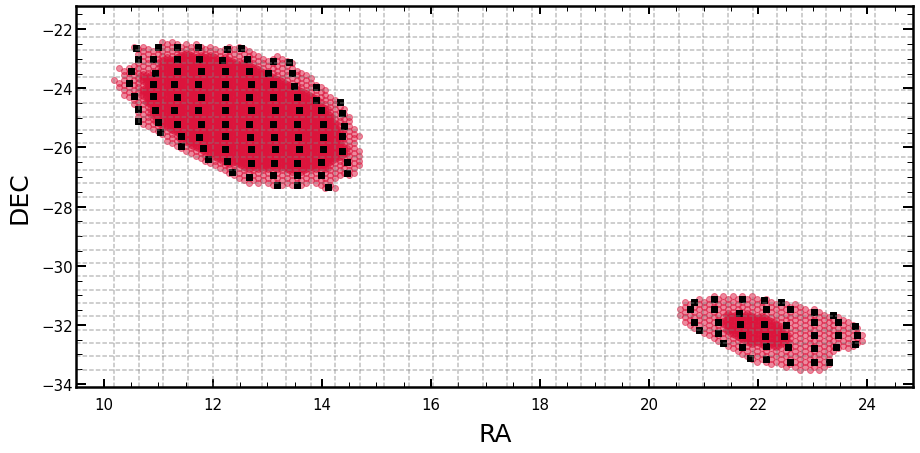

In [21]:
#Lets plot everything together to see if each pointing lies on the centre of the relevant grid.                
plt.scatter(ra_lst,dec_lst,marker='o',color='crimson',alpha=0.5)
plt.xlabel('RA', size=25)
plt.ylabel('DEC', size=25)
grid_values_ra=np.array(grid_values_ra)
for i in range(grid_values_ra.size):
    plt.axvline(x=grid_values_ra[i],linestyle='--',color='grey',alpha=0.5)

grid_values_dec=np.array(grid_values_dec)
for i in range(grid_values_dec.size):
    plt.axhline(y=grid_values_dec[i],linestyle='--',color='grey',alpha=0.5)    

plt.scatter(ra_grid_final,dec_grid_final, color='black', marker='s')

ra_dec_list=np.array([ra_grid_final,dec_grid_final]).T
np.savetxt('./ra_dec_list.txt',ra_dec_list)
plt.savefig(current_directory+'/LALskymap_ra_dec_pointings.pdf')
# GBM_ra=[197.45]
plt.savefig(current_directory+'/LALskymap_ra_dec_pointings.png')
# GBR_dec=[-23.3815]
# plt.scatter(GBM_ra,GBR_dec,color='dodgerblue')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


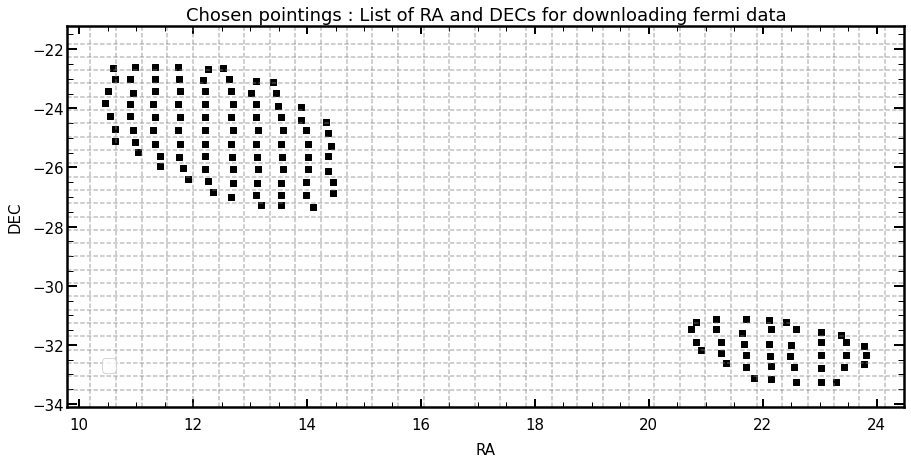

In [22]:
plt.scatter(ra_grid_final,dec_grid_final, color='black', marker='s')

for i in range(grid_values_ra.size):
    plt.axvline(x=grid_values_ra[i],linestyle='--',color='grey',alpha=0.5)

grid_values_dec=np.array(grid_values_dec)
for i in range(grid_values_dec.size):
    plt.axhline(y=grid_values_dec[i],linestyle='--',color='grey',alpha=0.5) 
    
plt.xlabel('RA',size=15)
plt.ylabel('DEC',size=15)
plt.title('Chosen pointings : List of RA and DECs for downloading fermi data')


#reveleant_pointings=np.genfromtxt('/home/arreeeyyyy/Documents/GW_GeV_counterpart_GSSI/analysis_test5/codes/relevant_recentered_ra_dec_info.txt')
#ra_rel=reveleant_pointings[:,0]
#dec_rel=reveleant_pointings[:,1]
#plt.scatter(ra_rel,dec_rel, color='red',marker='^',s=100,label='Pointings with counts > 0')
plt.legend(loc='best',prop={'size':18})
plt.savefig(current_directory+'/LALskymap_chosen_pointings.pdf')
plt.show()

In [ ]:
print ('Number of pointings within the 90% credible patch with given grid size', ra_grid_final.size)